Label and filter genes, so they can be traced after AE

In [1]:
import pickle
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Final script

Load sob gene matrix

In [2]:
filepath = '/Users/bogao/DataFiles/new landscape/data/sob_genes.pkl'
with open(filepath, 'rb') as fi:
    data = pickle.load(fi)
data.shape

(9636, 38074)

Convert logtRatio to copy number levels, and center at 0

In [3]:
data_levels = 2**(data+1)-2

Cap extrem values

In [4]:
data_levels[data_levels>6] =6

Sum all values of each gene

In [5]:
gene_level_sum = np.sum(data_levels, axis=0)
gene_level_sum.shape

(38074,)

Take average of the sum

In [8]:
gene_level_ave = gene_level_sum / data_levels.shape[0]

Plot value distribution

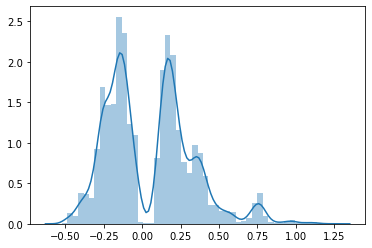

In [9]:
sns.distplot(gene_level_ave)

Create an index table for position tracing

In [11]:
gene_index_table = pd.DataFrame({'gene_level_ave': gene_level_ave, 'index':range(gene_level_ave.shape[0])})
gene_index_table

,gene_level_ave,index
0,0.741437,0
1,0.737956,1
2,0.741211,2
3,0.743214,3
4,0.742210,4
...,...,...
38069,-0.246438,38069
38070,-0.246312,38070
38071,-0.246095,38071
38072,-0.247700,38072


Filter genes by value

In [12]:
genes_03_index_table = gene_index_table.loc[abs(gene_index_table['gene_level_ave'])>=0.3]
genes_03_index_table = genes_03_index_table.assign(index_03 = range(genes_03_index_table.shape[0]))
genes_03_index_table

,gene_level_ave,index,index_03
0,0.741437,0,0
1,0.737956,1,1
2,0.741211,2,2
3,0.743214,3,3
4,0.742210,4,4
...,...,...,...
38052,-0.320486,38052,8578
38053,-0.311566,38053,8579
38056,-0.323153,38056,8580
38057,-0.323723,38057,8581


Generate the feature matrix of selected genes

In [14]:
genes_03_index = genes_03_index_table['index'].values
data_03 = data_levels[:,genes_03_index]
data_03.shape

(9636, 8583)

Save feature matix to file

In [16]:
filepath = '/Users/bogao/DataFiles/new landscape/data/sob_genes_03.pkl'
with open(filepath, 'wb') as fo:
    pickle.dump(data_03, fo)

Filter by < -0.4 or > 0.6

In [45]:
genes_0406_index_table = gene_index_table.loc[(gene_index_table['gene_level_ave'] < -0.4) |
                                              (gene_index_table['gene_level_ave'] > 0.6)]
genes_0406_index_table = genes_0406_index_table.assign(index_0406 = range(genes_0406_index_table.shape[0]))
genes_0406_index = genes_0406_index_table['index'].values
data_0406 = data_levels[:,genes_0406_index]

In [47]:
filepath = '/Users/bogao/DataFiles/new landscape/data/sob_genes_0406.pkl'
with open(filepath, 'wb') as fo:
    pickle.dump(data_0406, fo)

### Explorations

Get labels

In [17]:
filepath = '/Users/bogao/DataFiles/new landscape/data/sob_bands_label.pkl'
with open(filepath, 'rb') as fi:
    labels = pickle.load(fi)

In [21]:
labels_cancer_type = [i.split('_')[0] for i in labels]

Exclude arraymap breast data

In [ ]:
data = data[labels != 'breast_arraymap']

In [20]:
labels = labels[labels != 'breast_arraymap']

Data by cancer type

In [27]:
labels.shape

(4545,)

In [29]:
data_breast = data[np.array(labels_cancer_type) == 'breast']
data_breast.shape

(1159, 38074)

In [30]:
data_skin = data[np.array(labels_cancer_type) == 'skin']
data_skin.shape

(1238, 38074)

In [31]:
data_ovary = data[np.array(labels_cancer_type) == 'ovary']
data_ovary.shape

(2148, 38074)

Count genes in different value filters

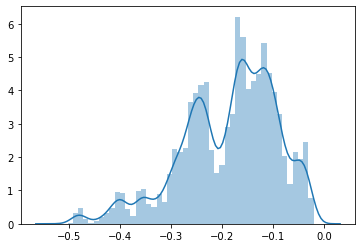

In [36]:
sns.distplot(gene_level_ave[gene_level_ave < 0])

In [41]:
np.sum(gene_level_ave < -0.4)

595

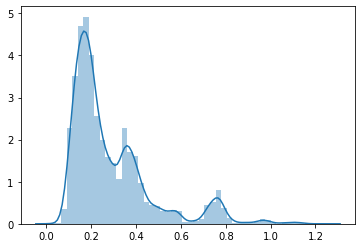

In [38]:
sns.distplot(gene_level_ave[gene_level_ave > 0])

In [43]:
np.sum(gene_level_ave > 0.6)

1458

Load sob gene matrix

In [ ]:
filepath = '/Users/bogao/DataFiles/new landscape/data/sob_genes.pkl'
with open(filepath, 'rb') as fi:
    data = pickle.load(fi)

In [ ]:
data.shape

In [ ]:
data

Convert to logRation to copy number levels

In [ ]:
(data_levels<=6).sum()

In [ ]:
(data>6).sum()

In [ ]:
(data_levels>6).sum()

In [ ]:
data_levels = 2**(data+1)-2

In [ ]:
data_levels[data_levels>6] =6

In [ ]:
data_levels>6

In [ ]:
data_levels.shape

In [ ]:
2**-21

In [ ]:
gene_level_sum = np.sum(data_levels, axis=0)

In [ ]:
gene_level_sum.shape

In [ ]:
(gene_level_sum/gene_level_sum.shape[0]).

In [ ]:
sns.distplot(gene_level_sum/data_levels.shape[0])

Sum each column

In [ ]:
gene_sum = np.sum(data,axis=0)

In [ ]:
gene_sum = np.sum(data_levels, axis=0)/data_levels.shape[0]

In [ ]:
gene_sum.shape

In [ ]:
gene_sum

In [ ]:
(np.abs(gene_sum)>0.3).sum()

In [ ]:
np.summary(gene_sum)

In [ ]:
sns.distplot(np.abs(gene_sum))

Index each column

In [ ]:
gene_sum_index_table = pd.DataFrame({'gene_sum': gene_sum, 'index':range(gene_sum.shape[0])})

In [ ]:
gene_sum_index_table

In [ ]:
gene_index_map = gene_sum_index_table.loc[abs(gene_sum_index_table['gene_sum'])>=0.3]

In [ ]:
gene_index_map.shape

In [ ]:
gene_index_map = gene_index_map.assign(f_index = range(gene_index_map.shape[0]))

In [ ]:
gene_index_map

In [ ]:
chosen_genes = gene_index_map['index'].values

In [ ]:
chosen_data = data_levels[:,chosen_genes]

In [ ]:
chosen_data.shape

Test field

In [ ]:
t = np.array([[0,2,3],[0,1,1]])

In [ ]:
t = np.append(t, [range(3)], axis=0)

In [ ]:
t

In [ ]:
t[:,[0,2]]

In [ ]:
gene_sum[:10]

In [ ]:
gene_sum_index_table[:10]

In [ ]:
sns.distplot(np.abs(gene_sum)/9636)

In [ ]:
t = np.array(range(10))

In [ ]:
t

In [ ]:
t[ (t>3) & (t<8) ]

In [ ]:
filepath = '/Users/bogao/DataFiles/new landscape/data/sob_bands.pkl'
with open(filepath, 'rb') as fi:
    band_data = pickle.load(fi)

In [ ]:
(band_data>6).sum()

In [ ]:
sns.distplot(band_data[band_data>6])

In [ ]:
sns.distplot(data[data>6])

In [ ]:
2**10